# 6.2 Exploring Relations
## This script contains the following:
#### 1. Importing Visulization libraries and dataset
#### 2. Data Cleaning
#### 3. Exploring relationships
         a. Correlations
         b. Scatterplots
         c. Pair plots
         d. Categorical plots

### 1. Import Visulization libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [62]:
# set path
path = r'/Users/mohammedRusso/Documents/DATA_ANALYST_COURSE/DATA_Immersion_Submissions/Assingment 6/04-2025 Billionaire Statistics'

In [46]:
#import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Billionaires Statistics_cleaned.csv'), index_col = False)

In [60]:
df.head()

,Rank,NetWorth($B),Age,Country,City,Industries,Self Made,Gender,Last Name,First Name,Birth Year,CPI Index,CPI Change,Country GDP,Country tertiary education enrollment,Country primary education enrollment,Country life expectancy,Population of country
0,1,211.0,74,France,Paris,Fashion & Retail,False,M,Arnault,Bernard,1949,110.05,1.1,2715518274227,65.6%,102.5%,82.5,67059887
1,2,180.0,51,United States,Austin,Automotive,True,M,Musk,Elon,1971,117.24,7.5,21427700000000,88.2%,101.8%,78.5,328239523
2,3,114.0,59,United States,Medina,Technology,True,M,Bezos,Jeff,1964,117.24,7.5,21427700000000,88.2%,101.8%,78.5,328239523
3,4,107.0,78,United States,Lanai,Technology,True,M,Ellison,Larry,1944,117.24,7.5,21427700000000,88.2%,101.8%,78.5,328239523
4,5,106.0,92,United States,Omaha,Finance & Investments,True,M,Buffett,Warren,1930,117.24,7.5,21427700000000,88.2%,101.8%,78.5,328239523


### 02 Data Cleaning

In [ ]:
#removing unnamed column
df = df.drop('Unnamed: 0', axis=1)

In [56]:
#As these graphs can only work with continuous variables, I need to ensure that all relevant columns have a numerical
#data type that is compatible with the heatmap, scatterplot and other plots.
df.dtypes

Rank                                       int64
NetWorth($B)                             float64
Age                                        int64
Country                                   object
City                                      object
Industries                                object
Self Made                                   bool
Gender                                    object
Last Name                                 object
First Name                                object
Birth Year                                 int64
CPI Index                                float64
CPI Change                               float64
Country GDP                                int64
Country tertiary education enrollment     object
Country primary education enrollment      object
Country life expectancy                  float64
Population of country                      int64
dtype: object

### 03 Exploring Relationships

In [76]:
# We need only numerical columns for correration analysis 
# Create a subset of variables of interger and floats
numerical_var = df.select_dtypes(include=['int','float'])

# we dont need the rank variabale for correlation
if 'Rank' in numerical_var.columns:
    numerical_var = numerical_var.drop(columns=['Rank'])
    
#Now we create the correlation matrix with the appropriate data
numerical_var.corr()

,NetWorth($B),Age,Birth Year,CPI Index,CPI Change,Country GDP,Country life expectancy,Population of country
NetWorth($B),1.000000,0.063319,0.034614,-0.037886,0.035835,0.037589,0.016834,-0.053024
Age,0.063319,1.000000,-0.009901,-0.006523,0.108680,-0.067725,-0.001774,-0.165681
Birth Year,0.034614,-0.009901,1.000000,0.026502,0.057251,0.020866,-0.028620,-0.040466
CPI Index,-0.037886,-0.006523,0.026502,1.000000,0.441177,-0.225610,-0.004835,0.232534
CPI Change,0.035835,0.108680,0.057251,0.441177,1.000000,0.389391,-0.101954,0.074800
Country GDP,0.037589,-0.067725,0.020866,-0.225610,0.389391,1.000000,0.062655,0.451567
Country life expectancy,0.016834,-0.001774,-0.028620,-0.004835,-0.101954,0.062655,1.000000,-0.184859
Population of country,-0.053024,-0.165681,-0.040466,0.232534,0.074800,0.451567,-0.184859,1.000000


In [80]:
#Now, we will drop 'Birth Year'
numerical_var = numerical_var.drop('Birth Year', axis=1)

### Correlation Hedatmap

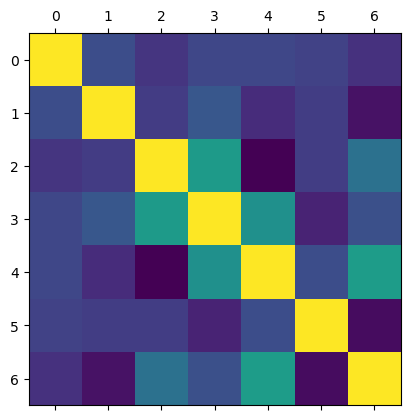

In [84]:
#Now, we use the above data to create a correlation heatmap using matplotlib

plt.matshow(numerical_var.corr())
plt.show()

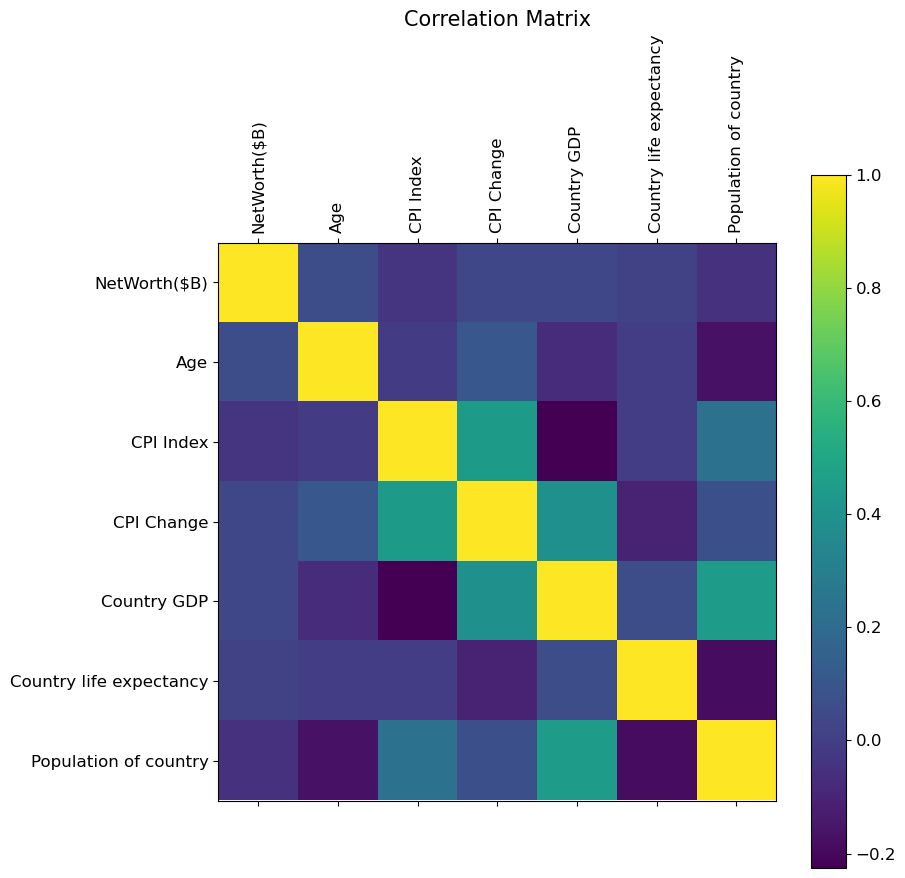

In [108]:
#Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
#For instance, discard “ID,” “date,” and “index” variables.

# Calculate correlation matrix
corr_matrix = numerical_var.corr()

# Create figure and plot heatmap
plt.figure(figsize=(9, 9))
plt.matshow(corr_matrix, fignum=0)  # fignum=0 uses the current figure
plt.xticks(range(len(numerical_var.columns)), numerical_var.columns, fontsize=12, rotation=90)
plt.yticks(range(len(numerical_var.columns)), numerical_var.columns, fontsize=12)

# Add colorbar and title
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=15)

plt.show()

#### The darker the color the stroger is the negative relationship is between the variables, conversly the lighter the color the stronger the positve relation

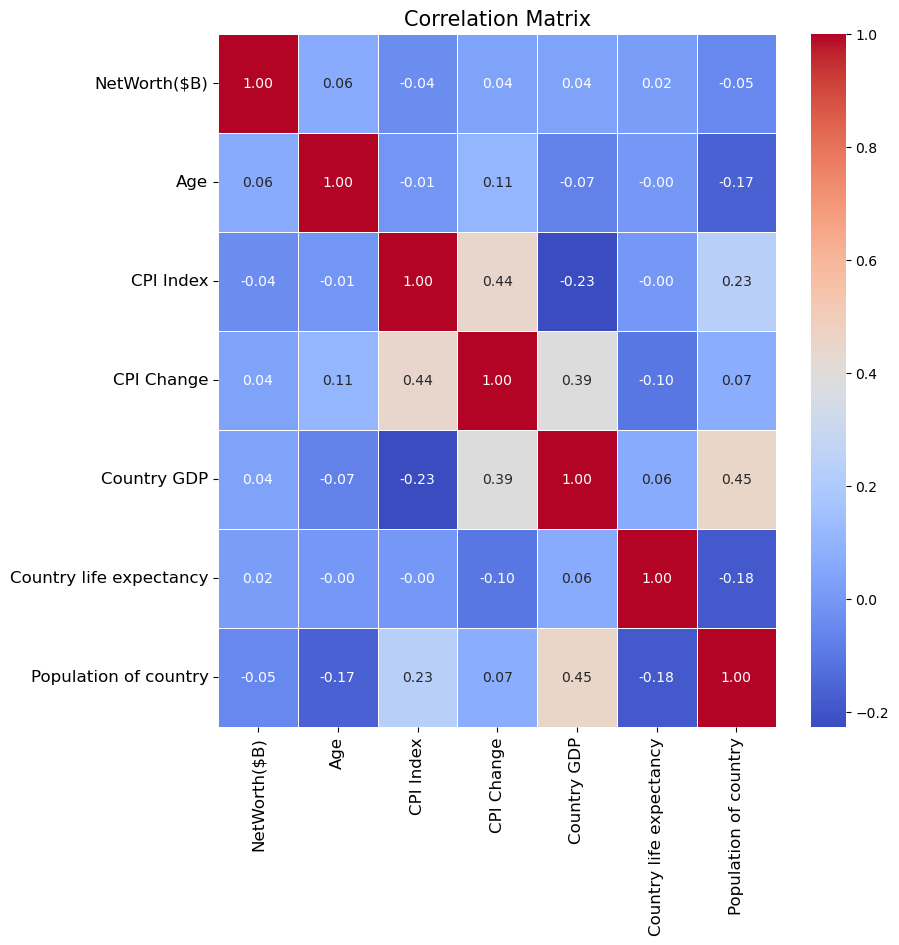

In [106]:
#Create a correlation matrix heatmap (colored).
#Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
plt.figure(figsize=(9, 9))
sns.heatmap(numerical_var.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Matrix', fontsize=15)
plt.show()

#### Here the relation is same as before, the lighter color are positive relations and darker colors represents negative relations

### Scatterplot

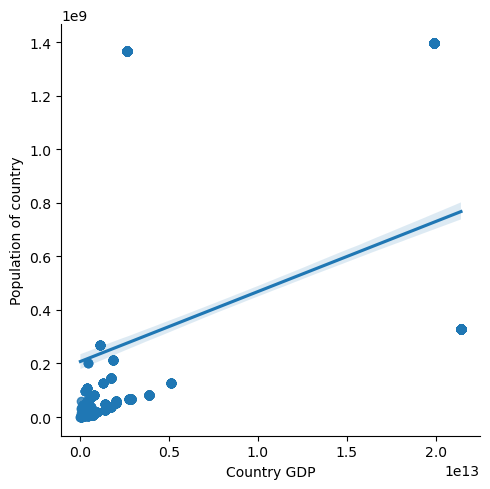

In [110]:
# Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
sns.lmplot(x = 'Country GDP', y = 'Population of country', data = numerical_var)

#### The scatter plot entails the the lower the population of the country the higher the GDP

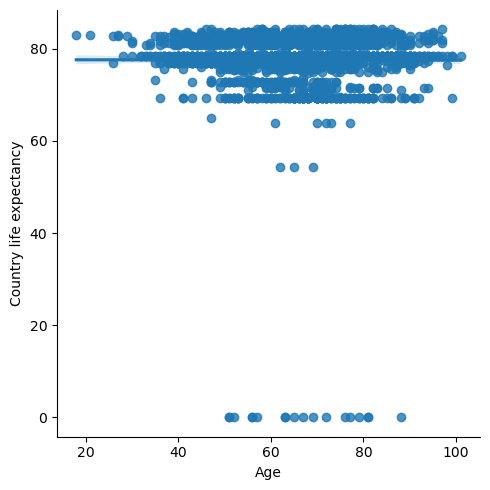

In [125]:
sns.lmplot(x = 'Age', y = 'Country life expectancy', data = numerical_var)

### Pair Plot

In [136]:
# Create a pair plot of the entire data set.
# Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

# Creating a subset of variables to be used for pair plot
subst_df = numerical_var[['NetWorth($B)', 'Age', 'Country GDP', 'Population of country', 'Country life expectancy']]

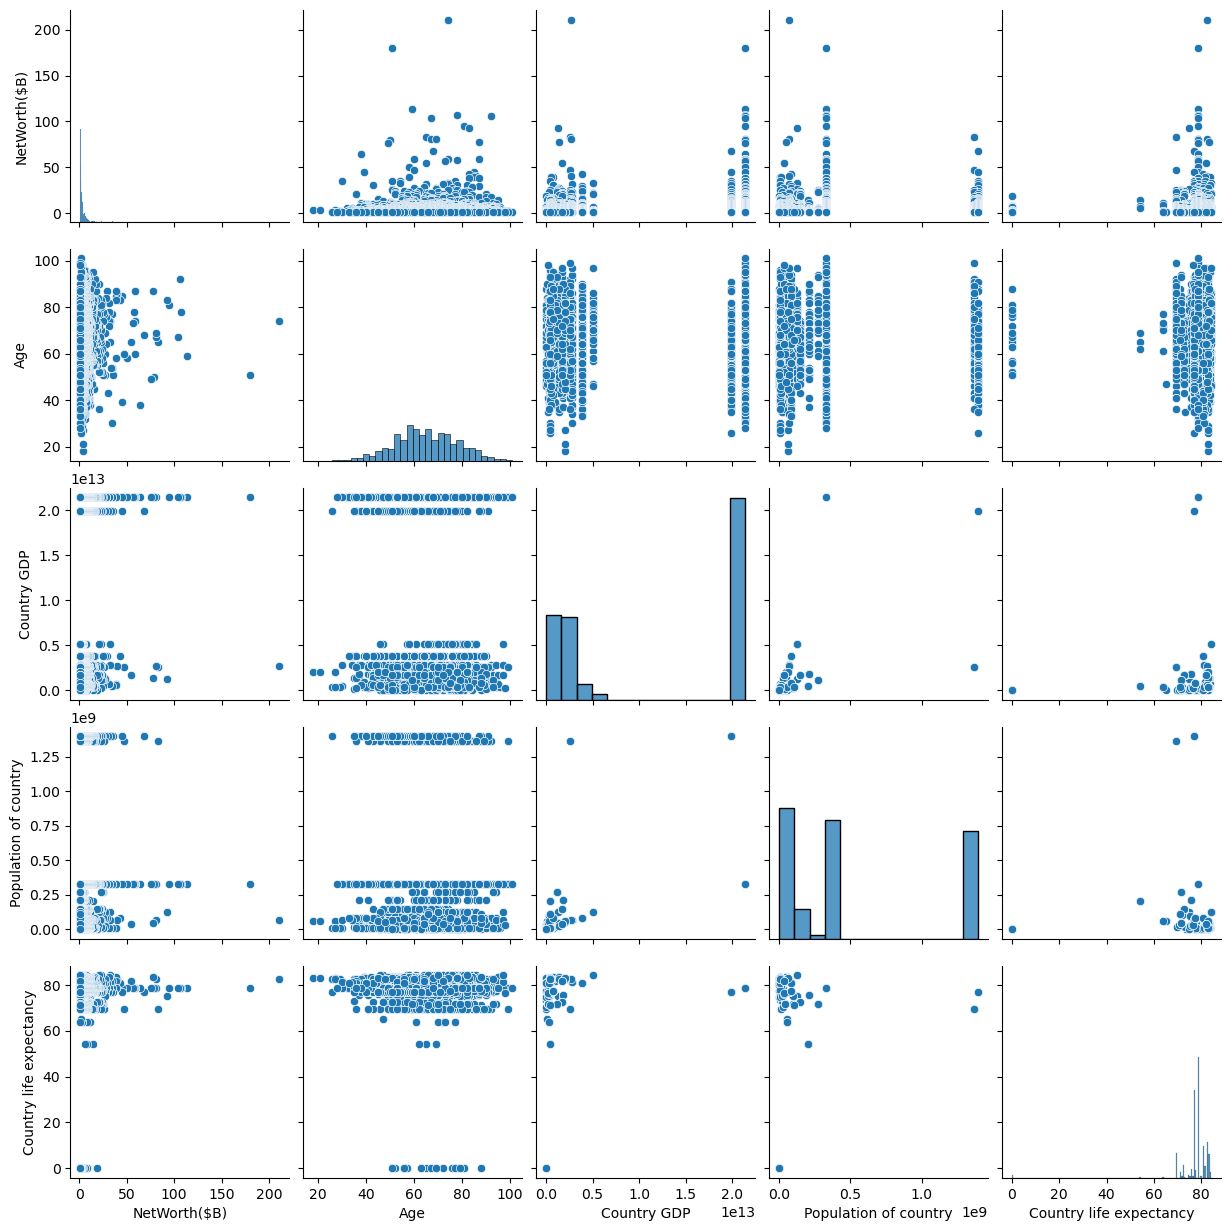

In [138]:
# Create a pair plot 

g = sns.pairplot(subst_df)

#### Its difficult to determine any standout distribution of variables from this pair plot. The NetWorh variable does not seem dependent on one particular varibale.

### Categorical Plots:

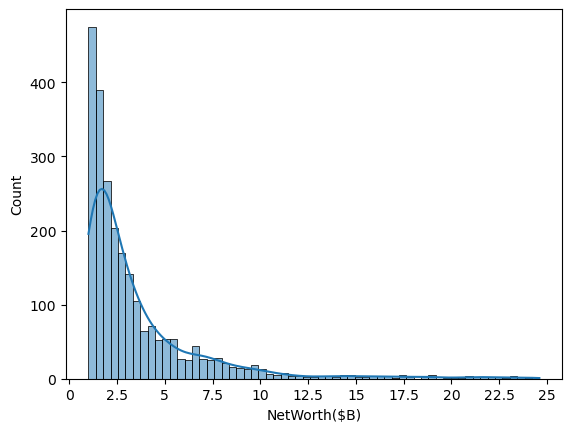

In [173]:
#Filter the df to include rows where net worth is less than or equal to 25 billion (98% of all observations)

filtered_df = df[df['NetWorth($B)']<=25]

sns.histplot(filtered_df['NetWorth($B)'], kde = True)
plt.xticks(np.arange(0,25.5,2.5), 
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25.5,2.5)])

plt.show()

In [175]:
# Create tiers of billionaire groups
df.loc[df['NetWorth($B)'] < 2.5, 'Billionaire Tier'] = 'Bottom Tier'

In [179]:
df.loc[(df['NetWorth($B)'] >= 2.5) & (df['NetWorth($B)'] < 4.5), 'Billionaire Tier'] = 'Top 50%'

In [181]:
df.loc[(df['NetWorth($B)'] >= 4.5) & (df['NetWorth($B)'] < 8.2), 'Billionaire Tier'] = 'Top 25%'

In [183]:
df.loc[(df['NetWorth($B)'] >= 8.2) & (df['NetWorth($B)'] < 13.8), 'Billionaire Tier'] = 'Top 10%'

In [185]:
df.loc[df['NetWorth($B)'] >= 13.8, 'Billionaire Tier'] = 'Top 5%'

In [187]:
df['Billionaire Tier'].value_counts()

Billionaire Tier
Bottom Tier    1280
Top 50%         604
Top 25%         347
Top 5%          123
Top 10%         122
Name: count, dtype: int64

In [213]:
#created a filtered subset to better display the categorical plot
filtered_df = df[df['NetWorth($B)'] <=25]

In [211]:
filtered_df['Age'].unique()

array([ 56,  52,  82,  62,  58,  80,  83,  70,  81,  65,  66,  61,  67,
        36,  60,  90,  77,  57,  72,  84,  73,  59,  55,  87,  92,  75,
        64,  45,  68,  78,  69,  95,  76,  47,  50,  38,  74,  88,  51,
        85,  93,  39,  43,  41,  53,  63,  71,  94,  44,  79,  49,  91,
        54,  42,  89,  37,  86,  40,  96,  46,  32,  34,  48,  35,  33,
        18,  27,  21,  29,  98,  99,  30,  26,  97, 101,  28])

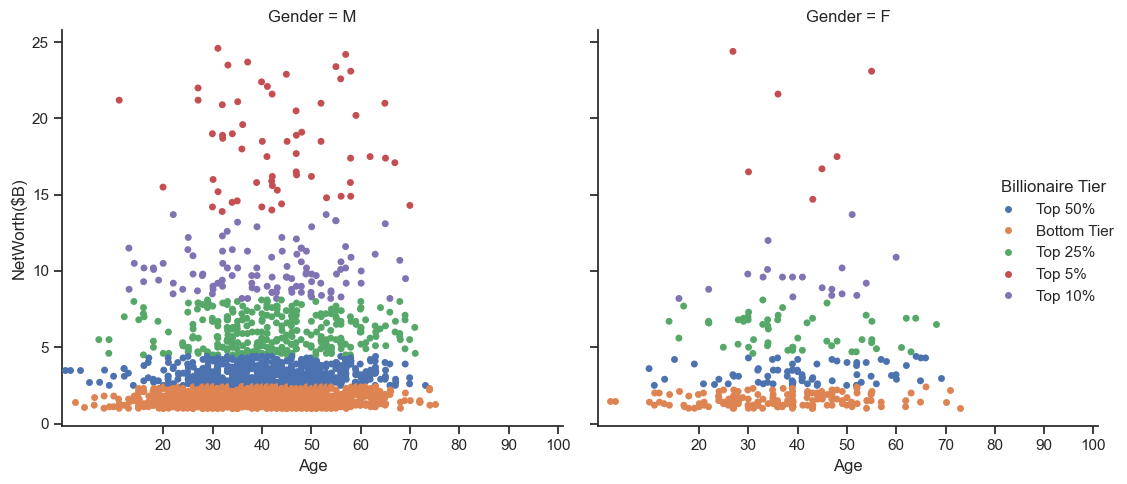

In [233]:
# Create a categorical plot in seaborn using the billionaire tier created above

sns.set(style="ticks")
#Create a Facet Grid with separate scatter plots for males and females
net_worth = sns.catplot(data =filtered_df, x='Age', y='NetWorth($B)', col='Gender', hue='Billionaire Tier')

#Establish x-axis limit by setting to length of df
plt.xticks(range(filtered_df['Age'].min(), filtered_df['Age'].max()+1))

#Manually set the x-axis tick positions and labels
plt.xticks([20, 30, 40, 50 , 60, 70, 80, 90, 100], labels=('20', '30', '40', '50', '60', '70', '80', '90', '100'))


plt.xticks(np.arange(20,110,10), 
           [int(value) if np.floor(value)==value else value for value in np.arange(20,110,10)])
plt.tight_layout()

plt.show()

In [272]:
# Distribution of billionaires across industries 
Top_industries = df['Industries'].value_counts().head(10)
Top_industries

Industries
Finance & Investments    345
Technology               299
Manufacturing            298
Fashion & Retail         252
Food & Beverage          201
Healthcare               197
Diversified              182
Real Estate              162
Energy                    96
Media & Entertainment     86
Name: count, dtype: int64

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_15473/2351456422.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ab = sns.barplot(x=Top_industries.index,


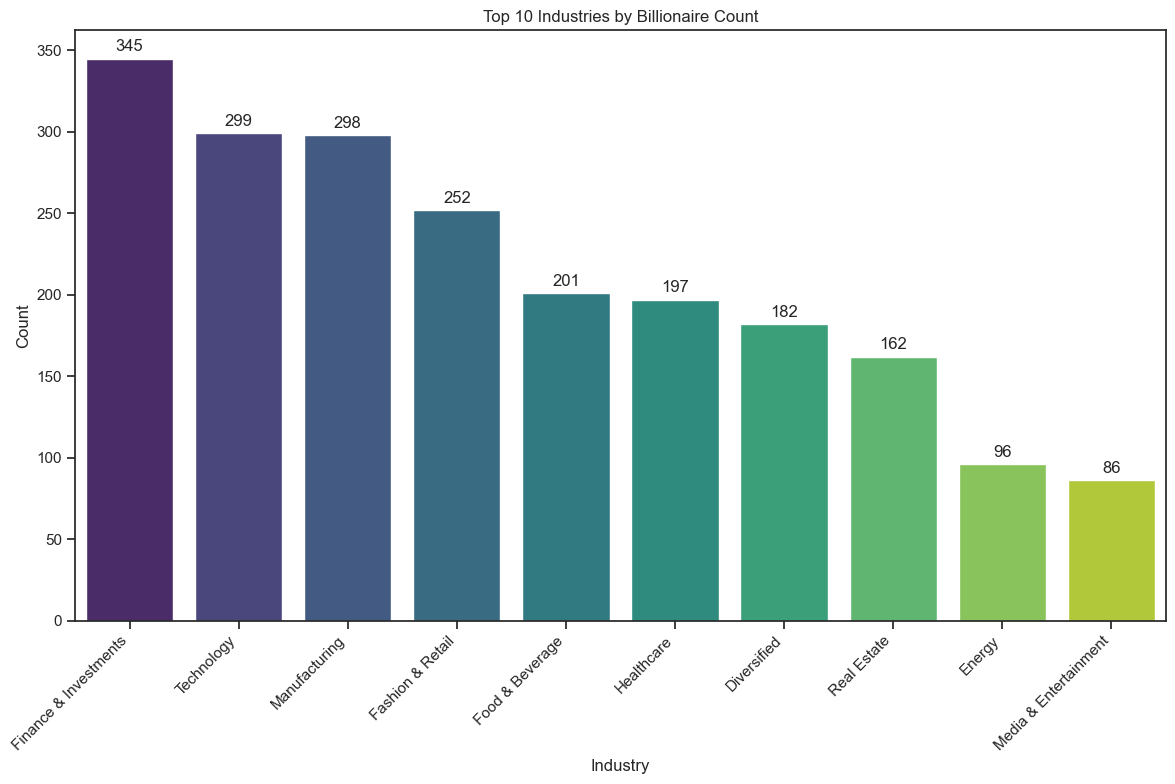

In [298]:
#Create a box plot showing the distribution of billionaires in the top 10 industries

Top_industries = df['Industries'].value_counts().head(10)

# Create a bar plot with different colors for each bar
plt.figure(figsize=(12, 8))
ab = sns.barplot(x=Top_industries.index, 
                 y=Top_industries.values,
                 palette="viridis") 

plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Top 10 Industries by Billionaire Count')

# Add value labels on top of each bar - this is the key fix
for container in ab.containers:
    ab.bar_label(container, padding=3)  # padding controls distance from bar top

plt.tight_layout()
plt.show()

In [302]:
# Country with the most Billionaires
top_countries = df['Country'].value_counts().head(10)
top_countries

Country
United States     754
China             523
India             157
Germany           102
United Kingdom     82
Russia             79
Switzerland        78
Italy              55
Singapore          46
Brazil             44
Name: count, dtype: int64

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_15473/4176516916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ab = sns.barplot(x=top_countries.index,


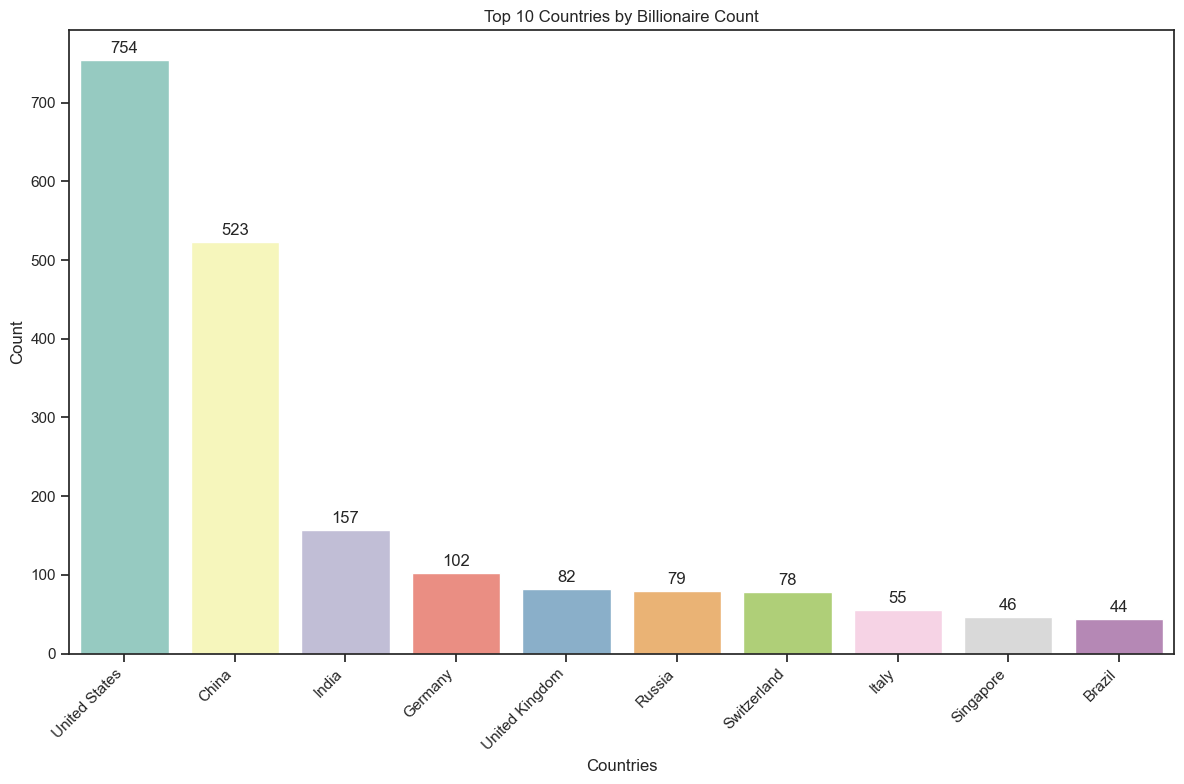

In [304]:
# Create a bar plot with different colors for each bar
plt.figure(figsize=(12, 8))
ab = sns.barplot(x=top_countries.index, 
                 y=top_countries.values,
                 palette="Set3") 

plt.xticks(rotation=45, ha='right')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top 10 Countries by Billionaire Count')

# Add value labels on top of each bar - this is the key fix
for container in ab.containers:
    ab.bar_label(container, padding=3)  # padding controls distance from bar top

plt.tight_layout()
plt.show()

In [380]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Aggregate data by country
country_stats = df.groupby('Country').agg(
    avg_net_worth=('NetWorth($B)', 'mean'),  # Average net worth per billionaire
    life_expectancy=('Country life expectancy', 'first'),  # Assuming one value per country
    billionaire_count=('First Name', 'count')  # Number of billionaires
).reset_index()

# Drop rows with missing life expectancy
country_stats = country_stats.dropna(subset=['life_expectancy'])

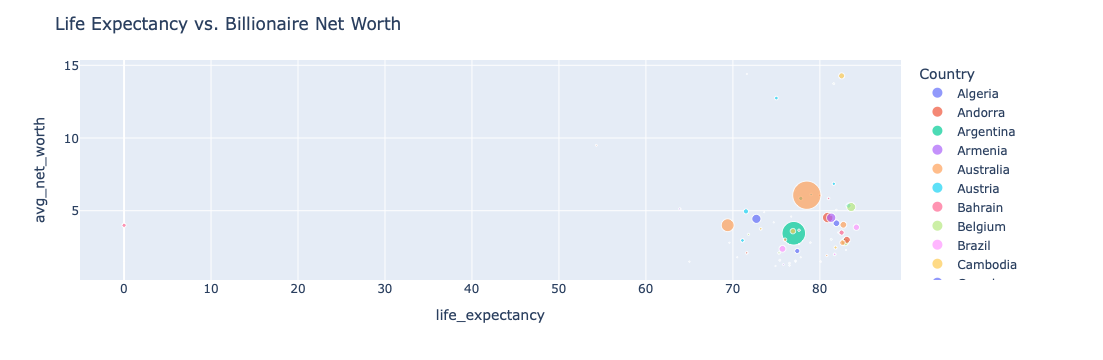

In [382]:
import plotly.express as px

fig = px.scatter(
    country_stats,
    x='life_expectancy',
    y='avg_net_worth',
    size='billionaire_count',
    color='Country',
    hover_name='Country',
    trendline='ols'  # Adds regression line
)
fig.update_layout(title='Life Expectancy vs. Billionaire Net Worth')
fig.show()

### Exploring hypothesis and Answering key questions

#### Which countries have the highest number of billionaires?
#####  More than 50% of the billionaires are in USA, China and India

#### How does net worth correlate with the GDP or economic indicators of a country?
##### Will need further analysis 

#### What is the gender distribution among the top billionaires?
##### Male: 87.56% Female: 12.44%

In [390]:
df['Gender'].value_counts()

Gender
M    2168
F     308
Name: count, dtype: int64

#### How does net worth compare between male and female billionaires?
##### Need further analysis 

#### Are younger billionaires more likely to be in certain industries (e.g., Technology) compared to older billionaires?
##### Need further analysis 

#### Distribution of billionaires across industries 
##### Finance & Investments, Technology, Manufacturing, Fashion & Retail, Food & Beverage are the top 5 industries among billionaires 

#### How does life expectancy in a country relate to the net worth of its billionaires?
##### Life expectency does not have a strong correlation to the net worth as seen in the correlation heatmap and the interactive chart

### Define Hypothesis

#### 1. Self-made billionaires are younger on average than those who inherited wealth.
#### 2. Billionaires in countries with higher GDP have greater net worth.
#### 3. Billionaires from countries with higher tertiary education enrollment rates have higher net worth.